<a href="https://colab.research.google.com/github/wakassodev/Brain-Tumor-Classification/blob/main/Headstarter_AI_Project_2_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [4]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:00<00:00, 167MB/s]
100% 149M/149M [00:00<00:00, 163MB/s]


In [5]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    #Check if it is a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })
  return df

In [6]:
tr_df = get_class_paths("/content/Training")

In [7]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0436.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0859.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0753.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0733.jpg,glioma


In [8]:
ts_df = get_class_paths("/content/Testing")

In [9]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0059.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0206.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0085.jpg,glioma


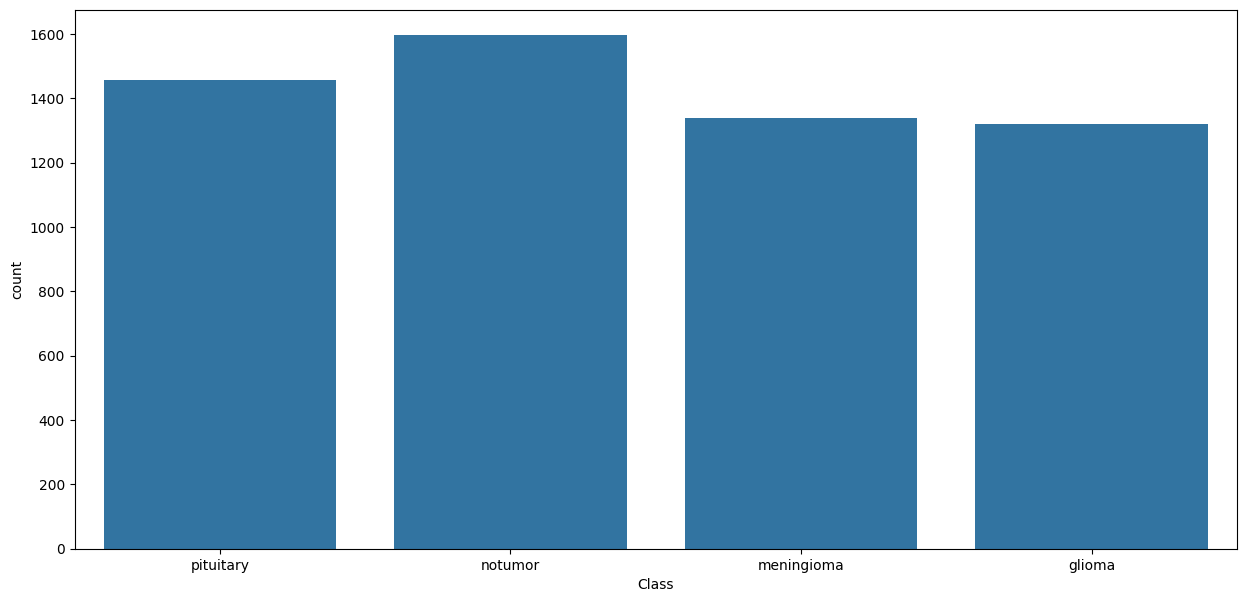

In [10]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

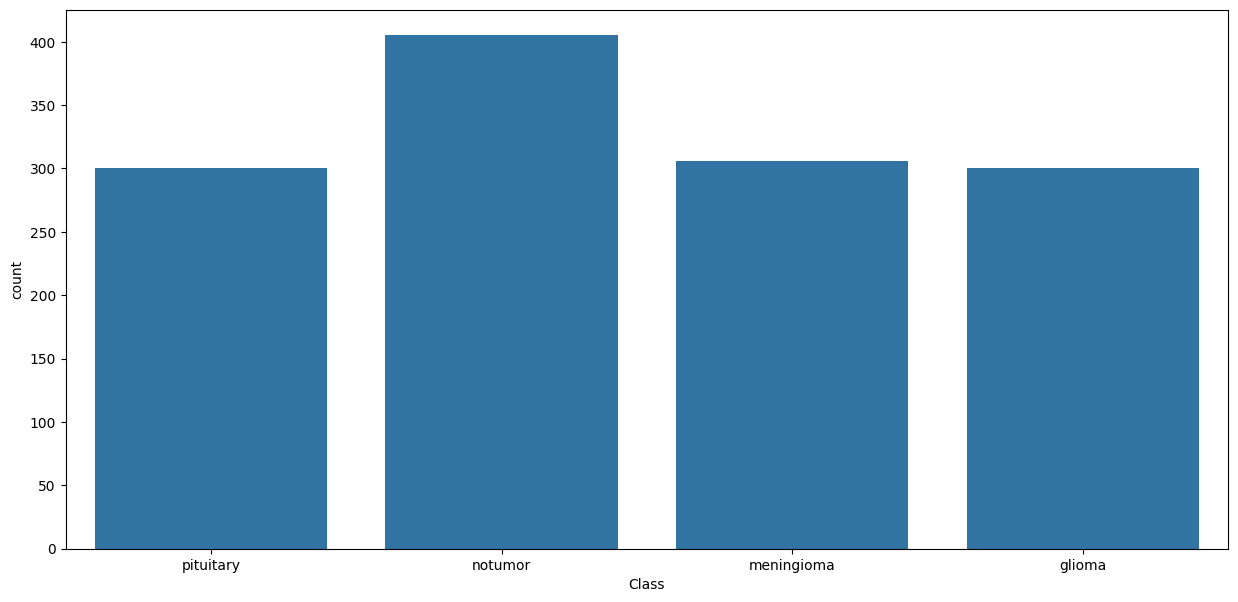

In [11]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5,  stratify=ts_df["Class"])

In [14]:
valid_df

,Class Path,Class
988,/content/Testing/meningioma/Te-meTr_0001.jpg,meningioma
395,/content/Testing/notumor/Te-no_0078.jpg,notumor
630,/content/Testing/notumor/Te-no_0075.jpg,notumor
546,/content/Testing/notumor/Te-no_0104.jpg,notumor
733,/content/Testing/meningioma/Te-me_0022.jpg,meningioma
...,...,...
969,/content/Testing/meningioma/Te-me_0185.jpg,meningioma
288,/content/Testing/pituitary/Te-pi_0250.jpg,pituitary
617,/content/Testing/notumor/Te-no_0365.jpg,notumor
72,/content/Testing/pituitary/Te-pi_0283.jpg,pituitary


In [15]:
ts_df

,Class Path,Class
364,/content/Testing/notumor/Te-no_0183.jpg,notumor
1039,/content/Testing/glioma/Te-gl_0033.jpg,glioma
278,/content/Testing/pituitary/Te-pi_0056.jpg,pituitary
945,/content/Testing/meningioma/Te-me_0271.jpg,meningioma
979,/content/Testing/meningioma/Te-me_0269.jpg,meningioma
...,...,...
261,/content/Testing/pituitary/Te-pi_0271.jpg,pituitary
977,/content/Testing/meningioma/Te-me_0109.jpg,meningioma
449,/content/Testing/notumor/Te-no_0018.jpg,notumor
638,/content/Testing/notumor/Te-no_0293.jpg,notumor


In [16]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [17]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col = "Class",
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col = "Class",
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col = "Class",
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


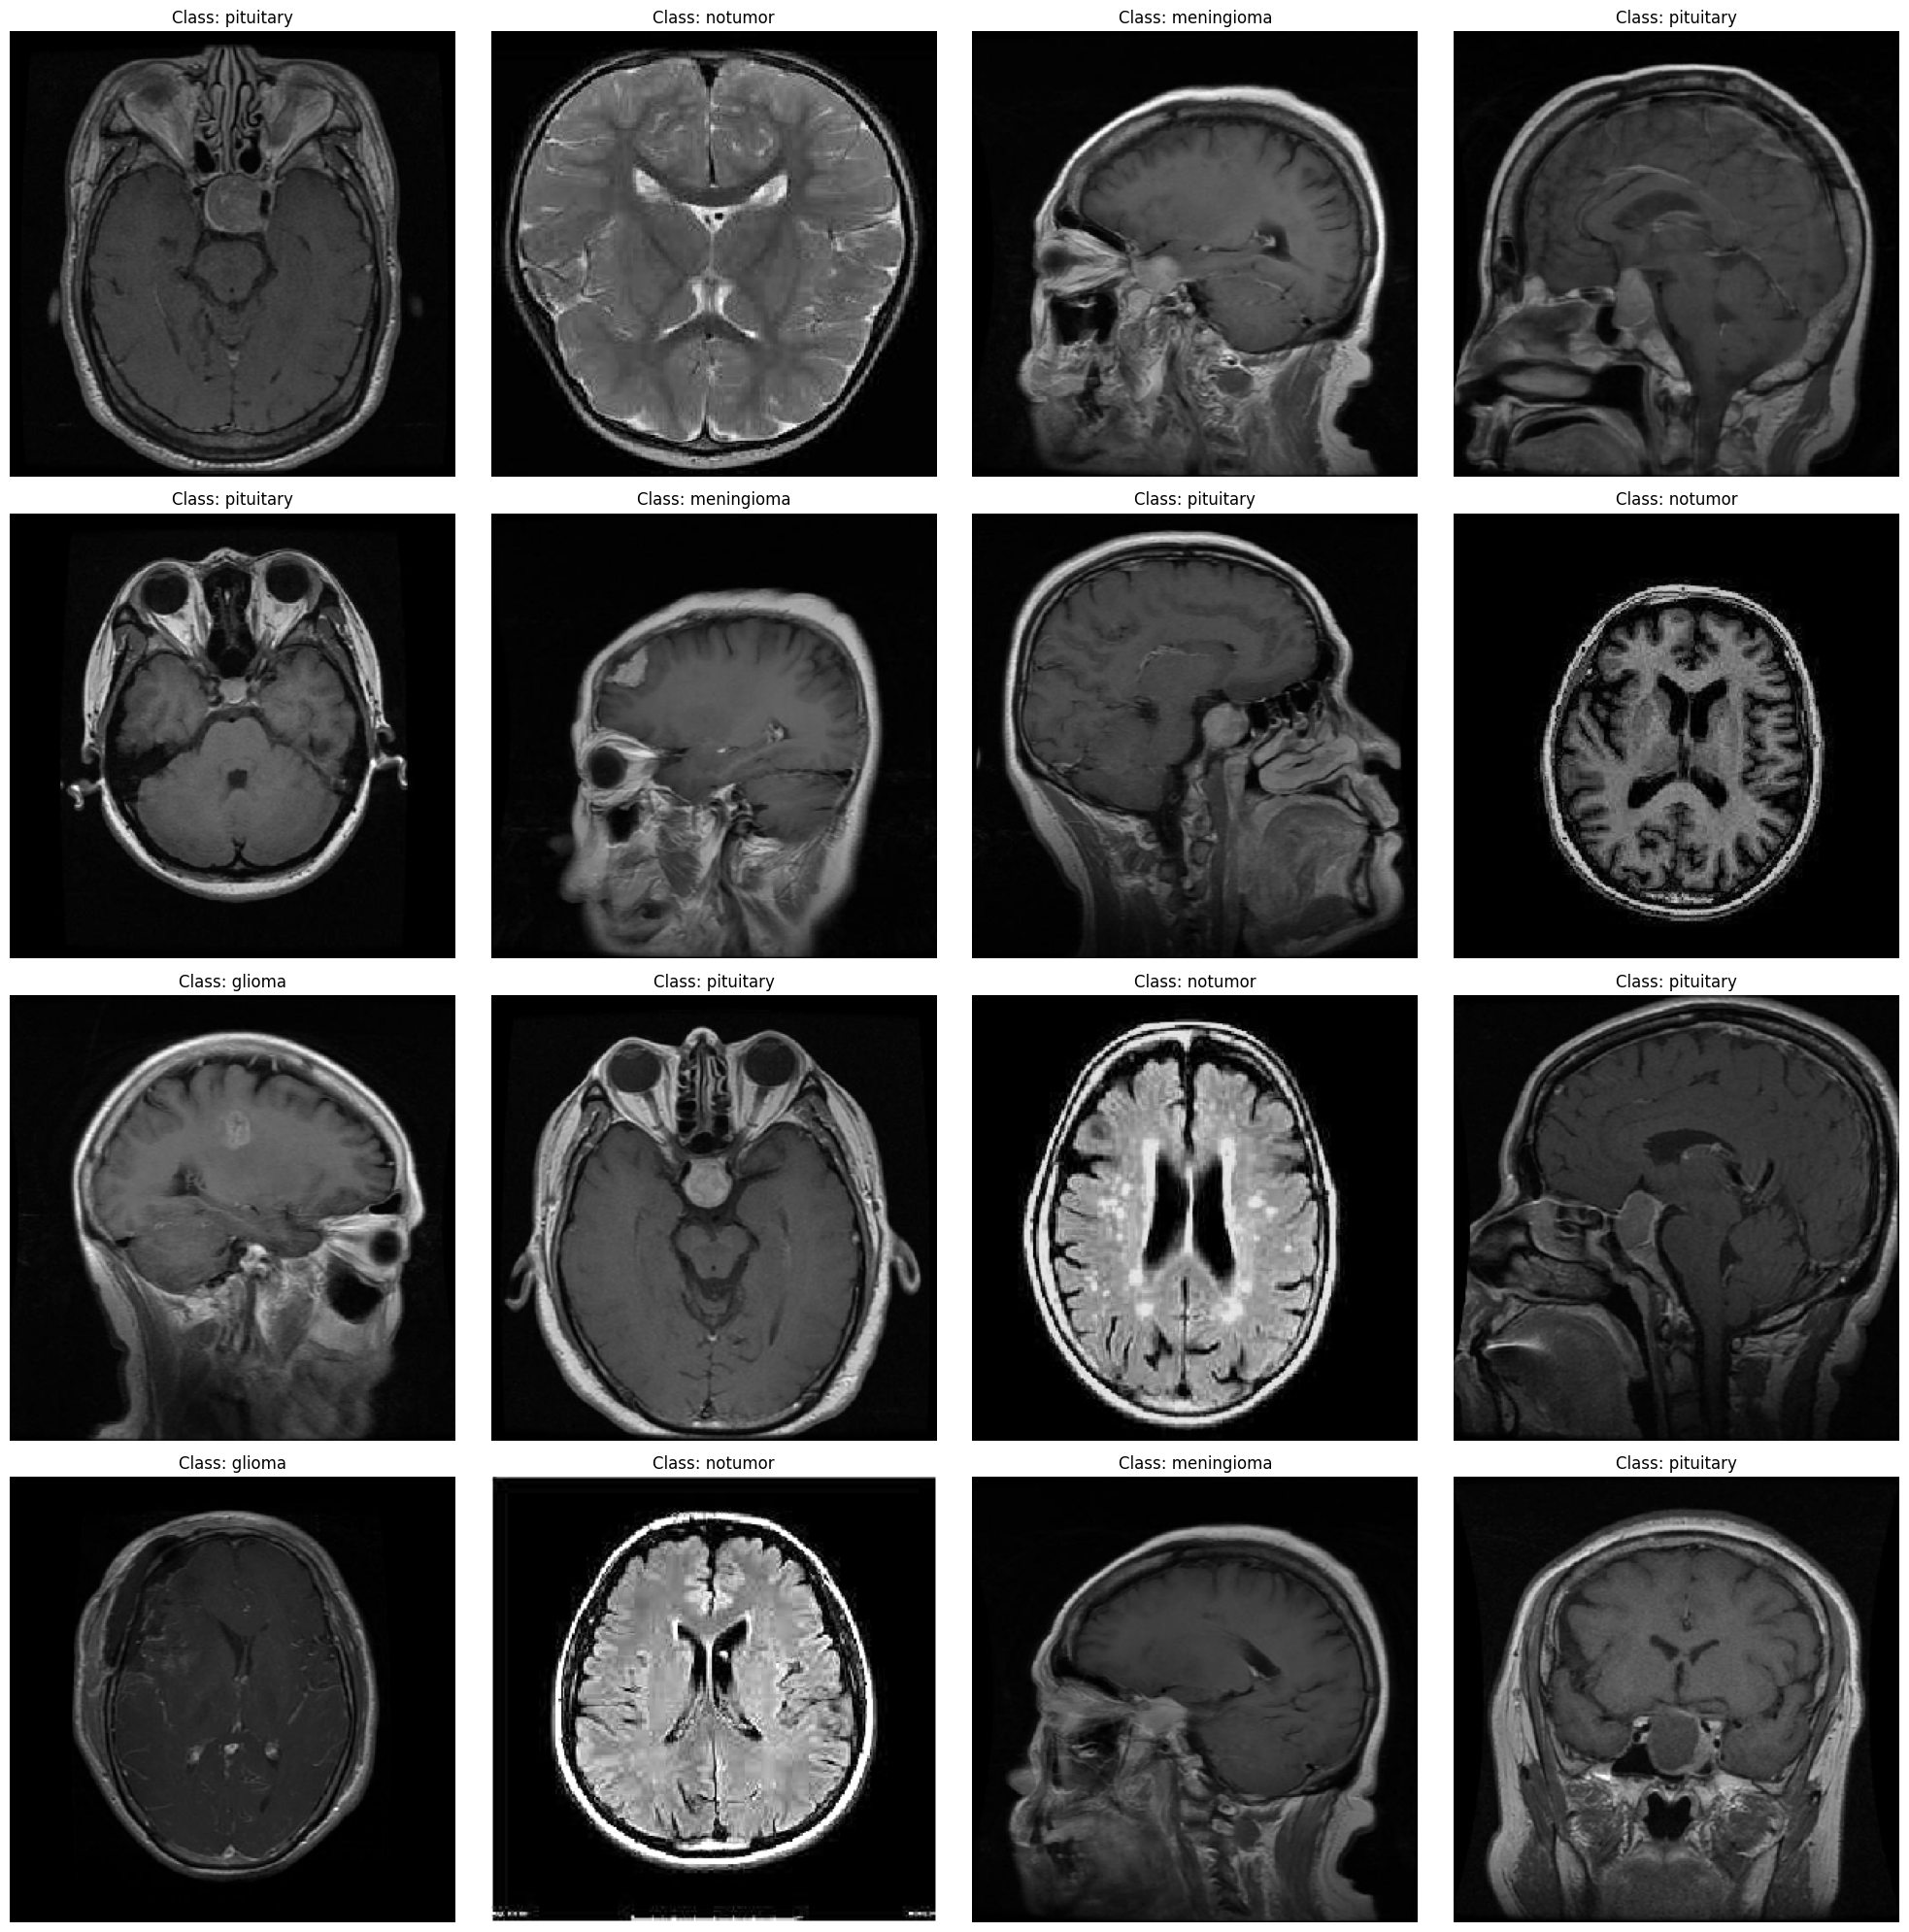

In [18]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the  class index
  class_index = np.argmax(label)

  # Get the list of class names and  indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show;

In [19]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top = False,
                                             weights = "imagenet",
                                             input_shape = img_shape,
                                             pooling = "max")

# Define the input tensor with the correct shape
input_tensor = tf.keras.Input(shape=img_shape)

# Pass the input tensor through the base model
x = base_model(input_tensor)

# Apply the remaining layers
x = Flatten()(x)
x = Dropout(rate = 0.3)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(rate = 0.25)(x)
x = Dense(4, activation = 'softmax')(x)

# Create the model
model = tf.keras.Model(inputs=input_tensor, outputs=x)

In [20]:
model.compile(Adamax(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy',
              Precision(),
              Recall()])

In [21]:
# hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

In [22]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}
# tr_metrics = {m: hist.history.get(m, hist.history.get(f'{m}')) for m in metrics}
# val_metrics = {m: hist.history.get(f'val_{m}', None) for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == "loss":
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show;

NameError: name 'hist' is not defined

In [ ]:
# train_score = model.evaluate(tr_gen, verbose=1)
# valid_score = model.evaluate(valid_gen, verbose=1)
# test_score = model.evaluate(ts_gen, verbose=1)

# print(f"Train Accuracy: {train_score[1]*100:.2f}%")
# print(f"Train Loss: {train_score[0]:.4f}")
# print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
# print(f"Validation Loss: {valid_score[0]:.4f}")
# print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
# print(f"Test Loss: {test_score[0]:.4f}")

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show();

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list (class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get predicted predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel('Probability', fontsize=15)
    plt.title('Class Probabilities')

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    # Show plot
    plt.tight_layout()
    plt.show()

    print(f'\n\nPredicted tumor type: {predicted_class}')


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [ ]:
predict("/content/Testing/meningioma/Te-me_0014.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

# Part 2: Streamlit Web

In [ ]:
! pip install streamlit pyngrok python-dotenv

In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get("NGROK_AUTH_TOKEN")

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
    os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

def load_xception_model(model_path):
    img_shape=(299, 299, 3)
    based_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                                input_shape=img_shape, pooling="max")

    model = Sequential([
        based_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    # Compile the model
    model.compile(Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=('accuracy',
                              Precision(),
                              Recall()))

    model.load_weights(model_path)

    return model


st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:

    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )

    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/drive/MyDrive/brain_tumor/xception_model.weights.h5')
        img_size = (299, 299)
    else:
        model = load_model('/content/drive/MyDrive/brain_tumor/cnn_model.h5')
        img_size = (224, 224)


    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")




In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
# ngrok.kill()
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)

In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
    ngrok.disconnect(tunnel.public_url)